<a href="https://colab.research.google.com/github/JamesPeralta/Machine-Learning-Algorithms/blob/master/Cats%20and%20Dogs%20Classifier/Using%20Pre-trained%20Model/CatsAndDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os
from keras.applications import VGG16
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cats_and_dogs = '/content/drive/My Drive/Datasets/CatsAndDogs'
os.chdir(cats_and_dogs)
os.listdir()

['test', 'train', 'validation']

In [4]:
conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape=(150, 150, 3))

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step


In [0]:
train_dir = os.path.join(cats_and_dogs, 'train') 
validation_dir = os.path.join(cats_and_dogs, 'validation') 
test_dir = os.path.join(cats_and_dogs, 'test')

In [0]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20


def extract_features(directory, sample_count):

    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))

    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

    i = 0
    for inputs_batch, labels_batch in generator:
        print("Batch " + str(i) + " for " + directory)
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [8]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2010 images belonging to 2 classes.
Batch 0 for /content/drive/My Drive/Datasets/CatsAndDogs/train
Batch 1 for /content/drive/My Drive/Datasets/CatsAndDogs/train
Batch 2 for /content/drive/My Drive/Datasets/CatsAndDogs/train
Batch 3 for /content/drive/My Drive/Datasets/CatsAndDogs/train
Batch 4 for /content/drive/My Drive/Datasets/CatsAndDogs/train
Batch 5 for /content/drive/My Drive/Datasets/CatsAndDogs/train
Batch 6 for /content/drive/My Drive/Datasets/CatsAndDogs/train
Batch 7 for /content/drive/My Drive/Datasets/CatsAndDogs/train
Batch 8 for /content/drive/My Drive/Datasets/CatsAndDogs/train
Batch 9 for /content/drive/My Drive/Datasets/CatsAndDogs/train
Batch 10 for /content/drive/My Drive/Datasets/CatsAndDogs/train
Batch 11 for /content/drive/My Drive/Datasets/CatsAndDogs/train
Batch 12 for /content/drive/My Drive/Datasets/CatsAndDogs/train
Batch 13 for /content/drive/My Drive/Datasets/CatsAndDogs/train
Batch 14 for /content/drive/My Drive/Datasets/CatsAndDogs/train
Batch 15

In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [10]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.5645 - acc: 0.7070 - val_loss: 0.4222 - val_acc: 0.8500
Epoch 2/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.4109 - acc: 0.8165 - val_loss: 0.3503 - val_acc: 0.8710
Epoch 3/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3502 - acc: 0.8510 - val_loss: 0.3166 - val_acc: 0.8850
Epoch 4/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3012 - acc: 0.8760 - val_loss: 0.2954 - val_acc: 0.8850
Epoch 5/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2842 - acc: 0.8870 - val_loss: 0.2798 - val_acc: 0.8900
Epoch 6/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2632 - acc: 0.8920 - val_loss: 0.2761 - v

{'val_loss': [0.4222327125072479, 0.35031734079122545, 0.31659760981798174, 0.29535687834024427, 0.2797844111919403, 0.2761435675621033, 0.262226740270853, 0.2561656749248505, 0.25370366290211677, 0.24626376271247863, 0.24565209880471228, 0.24855891838669777, 0.2399429202079773, 0.23976717114448548, 0.24445943027734757, 0.23646219804883004, 0.23681612730026244, 0.23813728109002114, 0.23624184116721153, 0.2357906948775053, 0.23542026050388812, 0.2395737760514021, 0.2438716536015272, 0.23659993931651116, 0.2522407220304012, 0.23951671950519085, 0.24128308899700643, 0.24740684531629087, 0.2390984905511141, 0.25014545626938345], 'val_acc': [0.8500000011920928, 0.8710000002384186, 0.8849999976158142, 0.8849999988079071, 0.8899999964237213, 0.8849999988079071, 0.8949999940395356, 0.8959999930858612, 0.9009999930858612, 0.8979999923706055, 0.898999993801117, 0.8939999902248382, 0.9019999945163727, 0.8999999928474426, 0.8939999914169312, 0.9009999942779541, 0.9009999942779541, 0.90199999451637

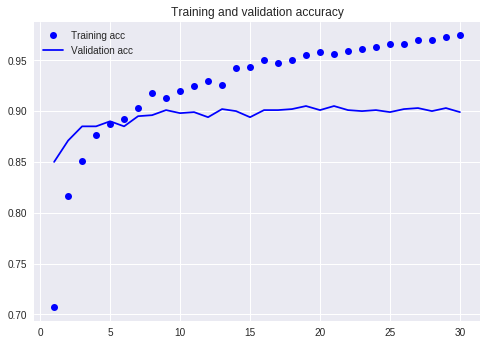

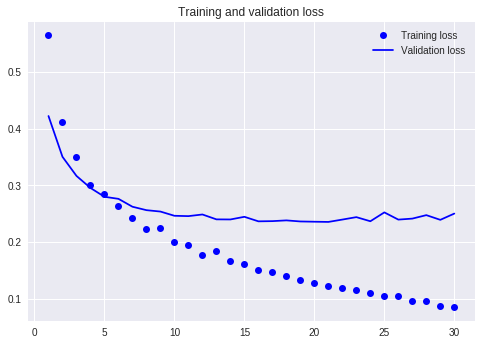

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()